In [48]:
from sklearn.datasets import fetch_olivetti_faces # 40명의 얼굴 사진이 10장씩 제공
import matplotlib.pyplot as plt

faces_all = fetch_olivetti_faces()
K = 7
faces = faces_all.images[faces_all.target == K]
X3 = faces_all.data[faces_all.target == K]

print(faces.shape)
print(X3.shape)

(10, 64, 64)
(10, 4096)


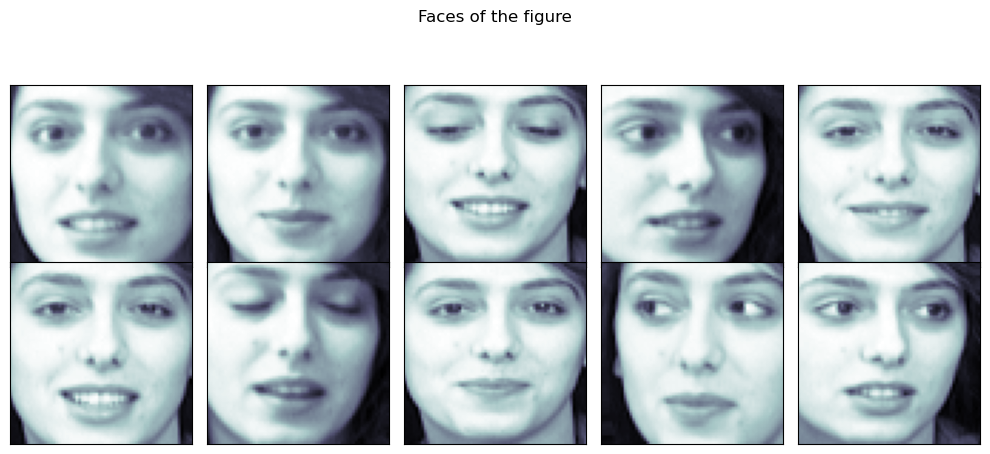

In [49]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap='bone')
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('Faces of the figure')
plt.tight_layout() # 서브플롯 간의 공간을 적절하게 조정하여 겹치는 레이블이나 제목이 서로 방해받지 않도록 그래프를 더 깔끔하게 표시
plt.show()

#### subplots_adjust( ):
  - 서브플롯 간의 간격과 상단, 하단 여백을 조정하는 데 사용
  - 이 함수는 각 파라미터를 통해 다양한 시각적 구성을 조정
    - top: 그래프의 최상단 여백을 조정
    - bottom: 그래프의 최하단 여백을 조정
    - hspace: 수평 서브플롯 간의 간격을 조정
    - wspace: 수직 서브플롯 간의 간격을 조정

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
W3 = pca.fit_transform(X3)
X3_2 = pca.inverse_transform(W3)

print(W3.shape)
print(X3_2.shape)

(10, 2)
(10, 4096)


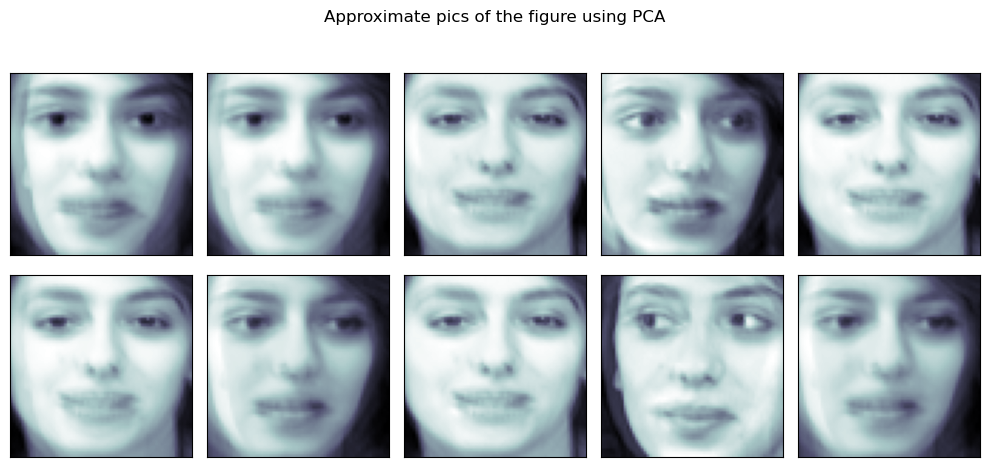

In [73]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X3_2[k].reshape(64,64), cmap='bone')
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle('Approximate pics of the figure using PCA')
plt.tight_layout() # 서브플롯 간의 공간을 적절하게 조정하여 겹치는 레이블이나 제목이 서로 방해받지 않도록 그래프를 더 깔끔하게 표시
plt.show()

In [52]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

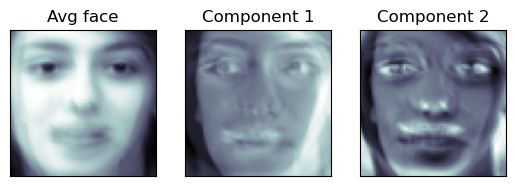

In [53]:
plt_imshow = [face_mean, face_p1, face_p2]
plt_title = ["Avg face", "Component 1", "Component 2"]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(plt_imshow[i], cmap='bone')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(plt_title[i])

plt.show()

#### subplot(i, j, n)
  - i행 j열의 서브플롯 구조 중 n 번째 위치에 서브플롯(그래프)을 생성하도록 지시

## 주성분 평균값 + w*제1주성분으로 복원한 이미지
  - 좌측 얼굴에서 우측 얼굴로 변화

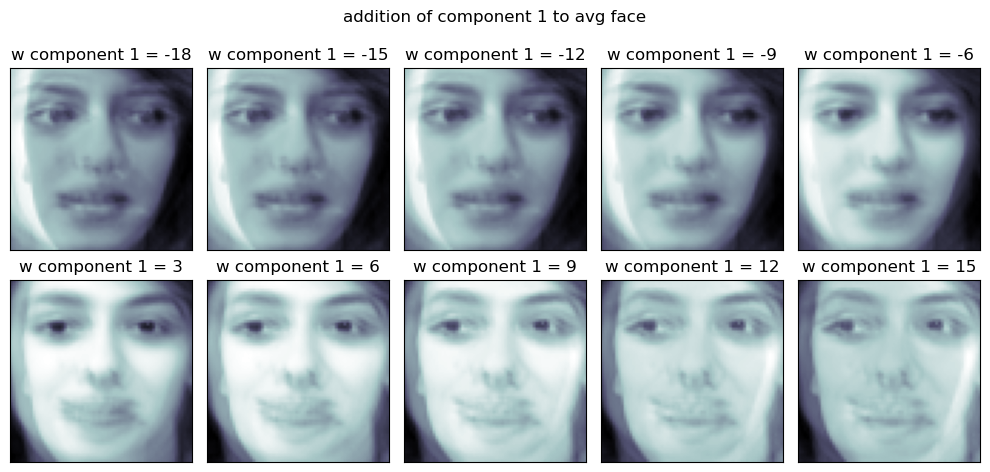

In [60]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0.5, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k -6) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap='bone')
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("w component 1 = {}".format(w))
plt.suptitle('addition of component 1 to avg face')
plt.tight_layout()
plt.show()

## 주성분 평균값+w*제2주성분으로 복원한 이미지 (w=-15~15)
  - 눈의 크기 변화

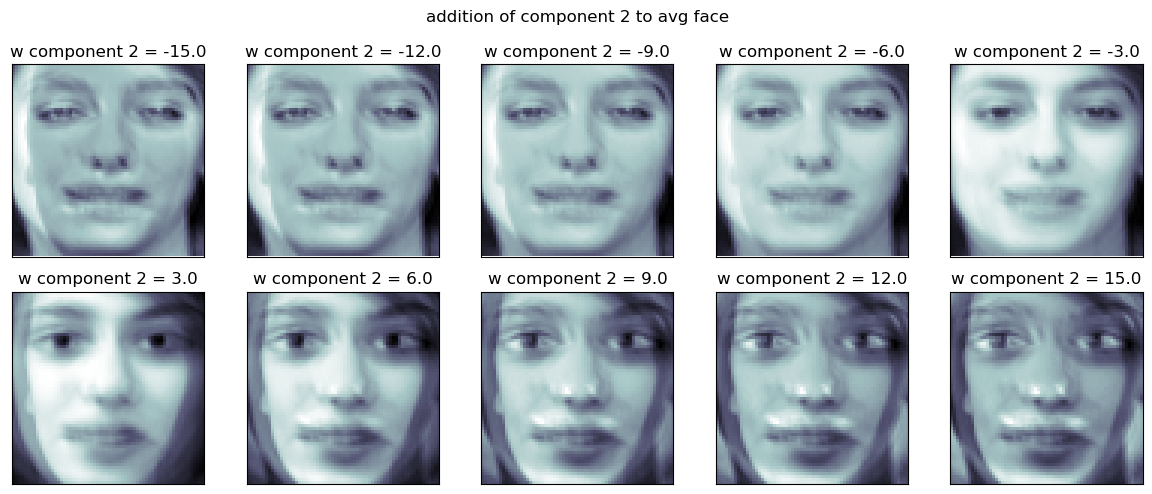

In [68]:
N = 2
M = 5
fig = plt.figure(figsize=(12, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=1, wspace=0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 3 * (k - 5) if k < 5 else 3 * (k - 4)
        ax.imshow(face_mean + w * face_p2, cmap='bone')
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("w component 2 = {:.1f}".format(w))
plt.suptitle('addition of component 2 to avg face')
plt.tight_layout()
plt.show()